# Results analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import pingouin
import os

import numpy as np
import random
random.seed(123)
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 12})

from utils import *
from plots import *
from analysis import *

In [2]:
PATH_regression_results='./regression_results/'

## Analysis

In [3]:
annot_224=get_annot(patch_size=224)
annot_256=get_annot(patch_size=256)

patches_per_tumor_256={}
patches_per_tumor_224={}

patches_per_tumor_224=get_tumor_data(patches_per_tumor_224, annot_224)
patches_per_tumor_256=get_tumor_data(patches_per_tumor_256, annot_256)

### Load files with regression results

In [4]:
filelist=glob.glob(PATH_regression_results+"*.csv")

### Check in how many cases *p*-value in Global Moran's I test is below significance level

In [5]:
total=0
Moran_significant=0
for i in sorted(filelist):
    df=custom_read_csv(i, split='test')   
    total+=df.shape[0]
    d=df[df.Moran_p<alpha]
    Moran_significant+=d.shape[0]
    
print(Moran_significant/total)  

0.994012749827705


### Check how many features remained after dropping out the correlated ones

In [6]:
n_not_correlated(filelist)        

{'k_24_CAMELYON16_224_resnetCLAM_weighted_50_0.0002_1e-05_adam_0.7_False_0.25_10_50_True_512_256': 409.85426356589153,
 'k_24_CAMELYON16_224_swin_base_patch4_window7_224_22k_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_50_True_512_128': 754.7577639751553,
 'k_24_CAMELYON16_224_vit_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_50_True_512_128': 703.2325581395348,
 'k_24_CAMELYON16_256_swinv2_base_patch4_window16_256_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_50_True_512_128': 747.1300940438871,
 'k_24_CAMELYON16_256_swinv2_base_patch4_window8_256_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_50_True_512_128': 735.6640746500777,
 'k_24_CAMELYON16_256_swinv2_small_patch4_window16_256_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_50_True_512_128': 571.9735202492212,
 'k_24_CAMELYON16_256_swinv2_small_patch4_window8_256_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_50_True_512_128': 576.8052959501558,
 'k_24_CAMELYON16_256_swinv2_tiny_patch4_window16_256_weighted_50_0.005_0.0_sgd_0.7_False_0.25_10_

## Aggregate results from folds (CONCATENATION)

### Stacked kernel distribution estimation plots

In [ ]:
df_p_test, d_per_images_test, dfs_test = aggregate_analyse_results(filelist, patches_per_tumor_224, 
                                                                   patches_per_tumor_256, 'test', 'concat')
df_p_train, d_per_images_train, df_train = aggregate_analyse_results(filelist, patches_per_tumor_224, 
                                                                     patches_per_tumor_256, 'train', 'concat')
#plots are saved to files

### Check whether SCM_features is bigger than SCM_targets

In [8]:
df_pairwise_features_targets_k=pairwise_features_targets(d_per_images_test, per_k=True)
df_pairwise_features_targets=pairwise_features_targets(d_per_images_test, per_k=False)

ranking of DL models based on mean SCM<sub>features</sub>

In [9]:
df_pairwise_features_targets.sort_values(by='mean_SCM_features', ascending=False, inplace=False).drop('k', axis=1)
#p-value when checking if SCM_features is greater than SCM_targets

,model_name,p_value,mean_SCM_features,mean_SCM_targets,max_SCM_features,max_SCM_targets
1,sv2_base_w8,3.037081e-162,0.006704,0.002208,0.047941,0.034254
8,vit,6.030753e-162,0.006271,0.003039,0.041229,0.030269
4,sv2_small_w16,3.037081e-162,0.006249,0.001881,0.037985,0.017911
7,resnetCLAM,3.055748e-162,0.005793,0.002869,0.045385,0.040079
0,s_base_w7,3.037081e-162,0.005599,0.001785,0.041359,0.024208
2,sv2_base_w16,3.037081e-162,0.005529,0.001559,0.038086,0.022667
5,sv2_tiny_w8,3.037081e-162,0.004961,0.001489,0.033935,0.021064
3,sv2_small_w8,3.037081e-162,0.004675,0.001317,0.029682,0.024008
6,sv2_tiny_w16,3.037081e-162,0.004441,0.001206,0.045232,0.030517


ranking of DL models based on mean SCM<sub>targets</sub>

In [10]:
df_pairwise_features_targets.sort_values(by='mean_SCM_targets', ascending=False).drop('k', axis=1) 

,model_name,p_value,mean_SCM_features,mean_SCM_targets,max_SCM_features,max_SCM_targets
8,vit,6.030753e-162,0.006271,0.003039,0.041229,0.030269
7,resnetCLAM,3.055748e-162,0.005793,0.002869,0.045385,0.040079
1,sv2_base_w8,3.037081e-162,0.006704,0.002208,0.047941,0.034254
4,sv2_small_w16,3.037081e-162,0.006249,0.001881,0.037985,0.017911
0,s_base_w7,3.037081e-162,0.005599,0.001785,0.041359,0.024208
2,sv2_base_w16,3.037081e-162,0.005529,0.001559,0.038086,0.022667
5,sv2_tiny_w8,3.037081e-162,0.004961,0.001489,0.033935,0.021064
3,sv2_small_w8,3.037081e-162,0.004675,0.001317,0.029682,0.024008
6,sv2_tiny_w16,3.037081e-162,0.004441,0.001206,0.045232,0.030517


### Impact of size of neighborhood (k) on the spatial context measures

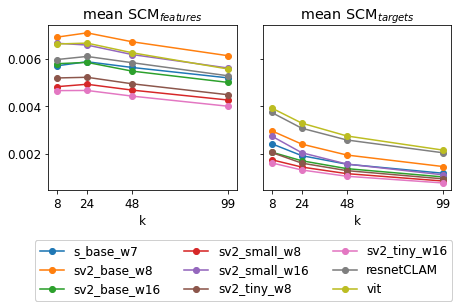

In [11]:
k_vs_metric(df_pairwise_features_targets_k, agg='mean')

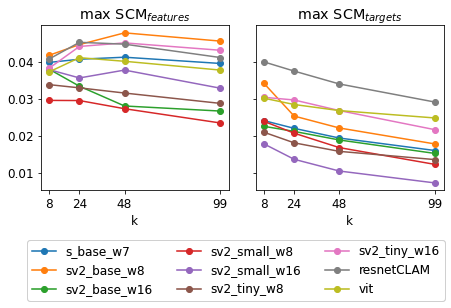

In [12]:
k_vs_metric(df_pairwise_features_targets_k, agg='max')

### Check in how many cases spatial context measures on train set are bigger than on test set

In [13]:
for metric in metric_names:
    d_train_test_p=mean_train_test(d_per_images_train, d_per_images_test, col=metric)
    percent_cases=d_train_test_p[d_train_test_p['p-value']<alpha].shape[0]/d_train_test_p.shape[0]
    print(f'percent of cases when the diff between mean {metric} on train is greater than on test set:{percent_cases}')

percent of cases when the diff between mean SCM_features on train is greater than on test set:0.8611111111111112
percent of cases when the diff between mean SCM_targets on train is greater than on test set:0.8888888888888888
percent of cases when the diff between mean SCM_residuals on train is greater than on test set:0.0


## Aggregate results from folds (MEAN)  

In [14]:
df_p_test, d_per_images_test, dfs_test= aggregate_analyse_results(filelist, patches_per_tumor_224, 
                                                                   patches_per_tumor_256, 'test', 'mean')
df_p_train, d_per_images_train, dfs_train= aggregate_analyse_results(filelist, patches_per_tumor_224, 
                                                                   patches_per_tumor_256, 'train', 'mean')

<Figure size 432x288 with 0 Axes>

### Neighborhood size vs. measure of tumor spread

In [15]:
tumor_images_stats=extract_tumor_images_stats(dfs_test, patches_per_tumor_224, filelist)

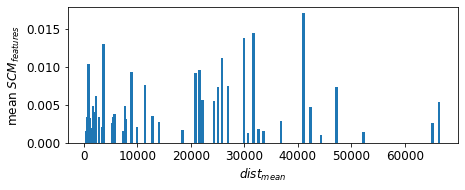

In [16]:
mean_dist=np.array([el[1] for el in tumor_images_stats.values()])
SCM_features_k99=np.array([el[-1] for el in tumor_images_stats.values()])

width=450

plt.figure(figsize=(7,2.5))
plt.bar(mean_dist,SCM_features_k99, width) 
plt.xlabel(r'$dist_{mean}$')
plt.ylabel(r'mean $SCM_{features}$')
plt.savefig(PATH_save_plots+'mean SCM_features_widespread_k99.png',  dpi=300, bbox_inches='tight');

### Correlation between mean_dist and metric measures given $k$ 

In [17]:
correlation_metric_k(tumor_images_stats, mean_dist)

SCM_targets, k=8, corr=0.21386419433363904
SCM_targets, k=24, corr=0.23270087514382287
SCM_targets, k=48, corr=0.2374117114886938
SCM_targets, k=99, corr=0.23552370933797975
SCM_features, k=8, corr=0.07043382412973748
SCM_features, k=24, corr=0.1038787327856549
SCM_features, k=48, corr=0.12145079430193426
SCM_features, k=99, corr=0.12460345457877073


### Most spatial

In [18]:
most_spatial, rarely_spatial = most_rarely_spatial(dfs_test, filelist, patches_per_tumor_224)

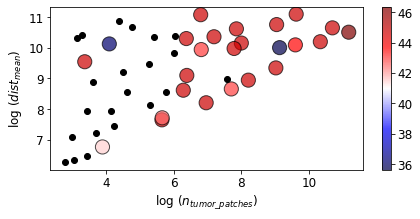

In [19]:
plot_most_least_spatial(most_spatial, rarely_spatial)

# Critical difference plot

In [ ]:
from critical_difference_plot import *
from utils import *

csv_path='../wandb_results.csv'
df_perf=prepare_performance_df(csv_path)
draw_cd_diagram(df_perf=df_perf, title='Accuracy ranking', labels=False) # plot is saved to file